In [1]:
import numpy as np
import pandas as pd
import cv2
%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt

# prepare images
folders = ['train-1-5',
 'train-1-2',
 'train-1-14',
 'train-1-13',
 'train-1-3',
 'train-1-4',
 'train-1-12',
 'train-1-15',
 'train-2-5',
 'train-2-2',
 'train-2-3',
 'train-2-4',
 'train-1-10',
 'train-1-8',
 'train-1-1',
 'train-1-6',
 'train-1-11',
 'train-1-7',
 'train-1-0',
 'train-1-9',
 'train-2-8',
 'train-2-1',
 'train-2-6',
 'train-2-7',
 'train-2-0',
 'train-2-9']

images = np.empty(shape=(26*7, 1024, 1024, 3)) 

for n, f in enumerate(folders):
    for i in range(7):
        images[n*7 + i] = cv2.imread('data/train_ready/%s/%d.png'%(f, i))

        
images.shape

(182, 1024, 1024, 3)

In [2]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into 
    the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()



In [3]:
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

input = layers.Input(shape=(1024, 1024, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), 
                  activation="relu", 
                  padding="same")(input)

x = layers.MaxPooling2D((2, 2), 
                        padding="same")(x)

x = layers.Conv2D(32, (3, 3), 
                  activation="relu", 
                  padding="same")(x)

x = layers.MaxPooling2D((2, 2), 
                        padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), 
                           strides=2, 
                           activation="relu", 
                           padding="same")(x)

x = layers.Conv2DTranspose(32, (3, 3), strides=2,
                           activation="relu", 
                           padding="same")(x)

x = layers.Conv2D(3, (3, 3), activation="sigmoid", 
                  padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 1024, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1024, 1024, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 512, 512, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 512, 512, 32)      9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 1024, 1024, 32)    9248  

In [43]:
train_data = images[:-10]

history = autoencoder.fit(x=train_data,
                            y=train_data,
                            epochs=5,
                            batch_size=10,
                            shuffle=True,
                        ).history


Epoch 1/5
18/18 [==============================] - 223s 12s/step - loss: -31048849162240.0000
Epoch 2/5
18/18 [==============================] - 207s 11s/step - loss: -39018951606272.0000
Epoch 3/5
18/18 [==============================] - 211s 12s/step - loss: -48521986179072.0000
Epoch 4/5
18/18 [==============================] - 474s 27s/step - loss: -59774859214848.0000
Epoch 5/5
18/18 [==============================] - 189s 10s/step - loss: -72977316052992.0000


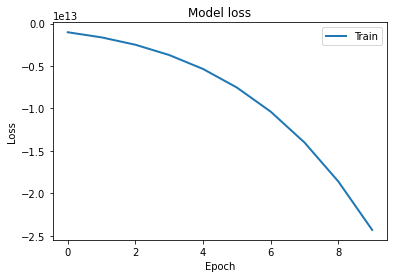

In [37]:
plt.plot(history['loss'], linewidth=2, label='Train')
# plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [38]:
predictions = autoencoder.predict(train_data)
#display(train_data, predictions)


In [39]:
cv2.imwrite('pred.png', predictions[100])

True

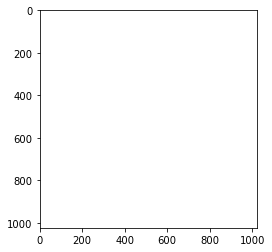

In [44]:
plt.imshow(predictions[10])

In [2]:
# why the white image pred?